In [1]:
import os
import tensorflow as tf
from tensorflow.contrib.rnn import GRUCell
from tensorflow.contrib.layers import fully_connected, flatten
from osim.env import RunEnv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
env = RunEnv(visualize=False)

In [118]:
s = env.reset()

In [119]:
s1, r, _, _ = env.step(env.action_space.sample())

In [46]:
labels = ['pos_pelvis_rotation', 'pos_pelvis_x','pos_pelvis_y', 
          'vel_pelvis_rotation', 'vel_pelvis_x', 'vel_pelvis_y',
          
          'rotation_ankle_dx', 'rotation_ankle_sx',
          'rotation_knee_dx', 'rotation_knee_sx', 
          'rotation_hip_dx', 'rotation_hip_sx',
          
          'vel_ankle_dx', 'vel_ankle_sx',
          'vel_knee_dx', 'vel_knee_sx', 
          'vel_hip_dx', 'vel_hip_sx',
          
         'pos_mass_x','pos_mass_y',
          'vel_mass_x', 'vel_mass_y',
          
         'pos_head_x', 'pos_head_y',
          'pos_pelvis_x_2', 'pos_pelvis_y_2', 
          
          'pos_torso_x', 'pos_torso_y',
          'pos_toe_left_x','pos_toe_left_y',
          
         'pos_toe_right_x', 'pos_toe_right_y',
          'pos_talus_left_x', 'pos_talus_left_y',
          
          'pos_talus_right_x', 'pos_talus_right_y',
         'strenght_psoas_left', 'strength_psoas_right',
          
         'dist_next_obs','pos_next_obs_y','radius_next_obs']

In [120]:
def augment_state(s, s1):
    
    s = np.reshape(np.array(s), (1,-1))
    s1 = np.reshape(np.array(s1), (1,-1))
    idxs = [22,24,26,28,30]
    
    vel = (s1[:,idxs] - s[:,idxs])/(0.01)
    
    return np.reshape( np.append( s1 , vel ) , (1 , -1) )

In [121]:
s = augment_state(s,s)

In [126]:
s

array([[ -5.00000000e-02,   0.00000000e+00,   9.10000000e-01,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         -6.97340552e-02,   9.70765629e-01,   0.00000000e+00,
          0.00000000e+00,   7.16953778e-03,   1.53657219e+00,
          0.00000000e+00,   9.10000000e-01,  -9.65008489e-02,
          9.96431049e-01,   7.98758013e-03,  -2.74414668e-02,
          7.98758013e-03,  -2.74414668e-02,  -1.19683332e-01,
          2.29523985e-02,  -1.19683332e-01,   2.29523985e-02,
          9.11166121e-01,   1.04295791e+00,   3.36984542e+00,
         -1.13914053e-03,   1.09066943e-01,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00]])

In [123]:
s1 = augment_state(s, s1)

In [125]:
s1

array([[ -4.77719753e-02,   9.00944615e-04,   9.10092615e-01,
          3.59984298e-01,   1.46802327e-01,   1.59562485e-02,
         -8.66561851e-03,   8.17703680e-03,   2.02262548e-02,
         -8.36281404e-03,   7.51906471e-03,   2.10187408e-02,
         -1.46004741e+00,   1.55203887e+00,   1.66748273e+00,
         -1.35646212e+00,   1.33854910e+00,   1.84744382e+00,
         -6.97559870e-02,   9.70803551e-01,  -3.07029175e-03,
          3.86678831e-03,   6.67444743e-03,   1.53667922e+00,
          9.00944615e-04,   9.10092615e-01,  -9.57922351e-02,
          9.96308443e-01,   8.25582714e-03,  -2.44818166e-02,
          8.26455279e-03,  -2.45346293e-02,  -1.20511928e-01,
          2.30394288e-02,  -1.20482408e-01,   2.30429240e-02,
          1.07706285e+00,   1.03435096e+00,   1.05856618e+00,
         -1.02188345e-02,   5.47842382e-02,  -4.95090345e-02,
          9.00944615e-02,   7.08613781e-02,   2.68247010e-02,
          2.76972658e-02]])

In [64]:
vel = (np.array(new_state) - np.array(new_state))/(0.01)
vel = vel[[22,24,26,28,30]]

IndexError: index 22 is out of bounds for axis 0 with size 1

In [60]:
vel.shape

(5,)

In [53]:
s = np.array(s)

In [61]:
new_state = np.reshape(np.concatenate((s,vel)), (1,-1))

In [33]:
s = tf.placeholder('float32', shape = (None, env.observation_space.shape[0]))

In [34]:
state = np.reshape(state, (1,-1))

In [59]:
s1 = s[:,:38]
s2 = s[:,38:]
h_size = [64,128]
act = tf.nn.elu

In [60]:
p_0 = fully_connected( inputs=s1 , num_outputs=h_size[ 0 ] , activation_fn=act )
p_1 = fully_connected(inputs=s2, num_outputs=h_size[0], activation_fn=act)

<tf.Tensor 'concat_6:0' shape=(?, 128) dtype=float32>

In [48]:
tf.concat((s1, s2), axis = 0)

ValueError: Dimension 0 in both shapes must be equal, but are 38 and 3 for 'concat_1' (op: 'ConcatV2') with input shapes: [?,38], [?,3], [] and with computed input tensors: input[2] = <0>.

In [6]:
file_list = os.listdir('logs/')

OSError: [Errno 2] No such file or directory: 'logs/'

In [4]:
a_list = [f for f in file_list if 'action' in f]
s_list = [f for f in file_list if 'state'  in f and 'next_state' not in f]
s1_list = [f for f in file_list if 'next_state' in f]
r_list = [f for f in file_list if 'reward' in f]
t_list = [f for f in file_list if 'terminal' in f]

NameError: name 'file_list' is not defined

In [5]:
def get_batch(idx, labels):
    
    s_batch = pd.read_csv('logs/'+s_list[idx],index_col=0, names=labels, header=0)
    a_batch = pd.read_csv('logs/'+a_list[idx],index_col=0)
    s1_batch = pd.read_csv('logs/'+s1_list[idx],index_col=0, names = labels, header=0)
    r_batch = pd.read_csv('logs/'+r_list[idx],index_col=0)
    return s_batch, a_batch, s1_batch, r_batch

In [2]:
labels = ['pos_pelvis_rotation', 'pos_pelvis_x','pos_pelvis_y', 
          'vel_pelvis_rotation', 'vel_pelvis_x', 'vel_pelvis_y',
          
          'rotation_ankle_dx', 'rotation_ankle_sx',
          'rotation_knee_dx', 'rotation_knee_sx', 
          'rotation_hip_dx', 'rotation_hip_sx',
          
          'vel_ankle_dx', 'vel_ankle_sx',
          'vel_knee_dx', 'vel_knee_sx', 
          'vel_hip_dx', 'vel_hip_sx',
          
         'pos_mass_x','pos_mass_y',
          'vel_mass_x', 'vel_mass_y',
          
         'pos_head_x', 'pos_head_y',
          'pos_pelvis_x_2', 'pos_pelvis_y_2', 
          
          'pos_torso_x', 'pos_torso_y',
          'pos_toe_left_x','pos_toe_left_y',
          
         'pos_toe_right_x', 'pos_toe_right_y',
          'pos_talus_left_x', 'pos_talus_left_y',
          
          'pos_talus_right_x', 'pos_talus_right_y',
         'strenght_psoas_left', 'strength_psoas_right',
          
         'dist_next_obs','pos_next_obs_y','radius_next_obs']

In [3]:
s_batch, a_batch, s1_batch, r_batch = get_batch(0, labels)

NameError: name 'get_batch' is not defined

In [7]:
s_batch

,pos_pelvis_rotation,pos_pelvis_x,pos_pelvis_y,vel_pelvis_rotation,vel_pelvis_x,vel_pelvis_y,rotation_ankle_dx,rotation_ankle_sx,rotation_knee_dx,rotation_knee_sx,...,pos_toe_right_y,pos_talus_left_x,pos_talus_left_y,pos_talus_right_x,pos_talus_right_y,strenght_psoas_left,strength_psoas_right,dist_next_obs,pos_next_obs_y,radius_next_obs
0,-0.050000,0.000000,0.910000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.027441,-0.119683,0.022952,-0.119683,0.022952,1.000000,1.000000,100.000000,0.000000,0.000000
1,-0.048318,0.000687,0.910078,0.230424,0.096114,0.013833,-0.005811,0.004277,0.021314,-0.007137,...,-0.024618,-0.120442,0.023042,-0.120483,0.023024,0.966749,1.154373,1.156822,0.025758,0.135741
2,-0.045234,0.001988,0.910314,0.379946,0.161660,0.032906,-0.015843,0.012741,0.037003,-0.023488,...,-0.022194,-0.120995,0.023378,-0.121123,0.023227,0.966749,1.154373,1.155521,0.025758,0.135741
3,-0.040905,0.003846,0.910708,0.477483,0.206633,0.043972,-0.029999,0.025671,0.047464,-0.049107,...,-0.020064,-0.121318,0.024160,-0.121603,0.023596,0.966749,1.154373,1.153663,0.025758,0.135741
4,-0.035805,0.006072,0.911152,0.537409,0.236425,0.042365,-0.047517,0.042877,0.053705,-0.081626,...,-0.018136,-0.121416,0.025525,-0.121969,0.024086,0.966749,1.154373,1.151437,0.025758,0.135741
5,-0.030197,0.008549,0.911498,0.584468,0.258420,0.023944,-0.067928,0.063791,0.060213,-0.118905,...,-0.015959,-0.121341,0.027516,-0.122420,0.024611,0.966749,1.154373,1.148960,0.025758,0.135741
6,-0.024164,0.011213,0.911555,0.615973,0.270914,-0.014700,-0.090092,0.085790,0.074459,-0.158786,...,-0.012933,-0.121361,0.029978,-0.123264,0.024992,0.966749,1.154373,1.146296,0.025758,0.135741
7,-0.018208,0.013783,0.911235,0.562039,0.235121,-0.045375,-0.112294,0.107463,0.094826,-0.192238,...,-0.009381,-0.122476,0.031924,-0.124412,0.025129,0.966749,1.154373,1.143726,0.025758,0.135741
8,-0.012600,0.016039,0.910714,0.593553,0.231001,-0.056921,-0.134555,0.130451,0.115622,-0.208508,...,-0.005663,-0.124437,0.031958,-0.125640,0.025231,0.966749,1.154373,1.141470,0.025758,0.135741
9,-0.005823,0.018638,0.910117,0.775733,0.295397,-0.062595,-0.161985,0.160004,0.134133,-0.219387,...,-0.001624,-0.125169,0.031144,-0.126886,0.025593,0.966749,1.154373,1.138871,0.025758,0.135741


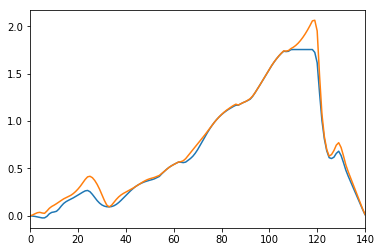

In [59]:
# speed of the body mass
s_batch.vel_mass_x.plot()
s_batch[['vel_mass_y', 'vel_mass_x']].apply(np.square).apply(np.sum,axis = 1).apply(np.sqrt).plot()
plt.show()

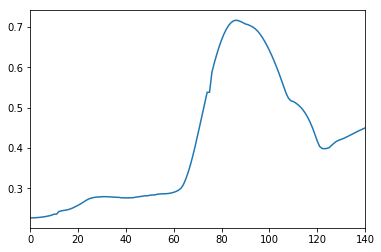

In [60]:
# penalize wide movements of the leg
abs(s_batch.pos_torso_y - s_batch.pos_talus_right_y-1.2).plot()
plt.show()

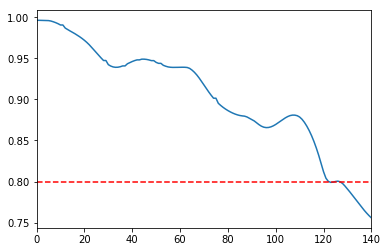

In [61]:
# penalize falling point
s_batch.pos_torso_y.plot()
xs = np.linspace(start=0, stop=140)
y = np.array([0.8 for x in range(len(xs))])
plt.plot(xs, y, 'r--')
plt.show()

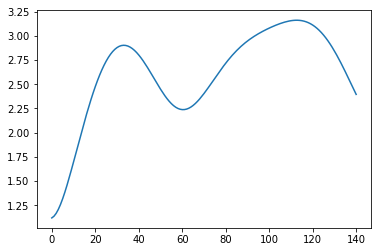

In [73]:
# bound on the dimension at each step. Should smooth interaction
plt.plot(np.linalg.norm(a_batch.as_matrix(),axis=1))
plt.show()

In [83]:
def reward(s_batch):
    delta_h = s_batch.pos_torso_y - s_batch.pos_talus_right_y
    vel = s_batch[['vel_mass_y', 'vel_mass_x']].apply(np.square).apply(np.sum,axis = 1).apply(np.sqrt)
    rw = 5*vel - abs(delta_h-1.2) - 0.1 * np.linalg.norm(a_batch.as_matrix(),axis=1) - 5*(s_batch.pos_torso_y < 0.8)
    return rw

In [57]:
labels.index('vel_mass_x')

20

In [37]:
act = a_batch.loc[0,:].as_matrix()

In [41]:
act = np.reshape(act, (1,-1))

In [38]:
s1, r, t, _ = env.step(act)

In [43]:
obs = np.reshape(s1, ((1,-1)))
obs = np.append(obs, [[1]], axis=1)  # add time step feature

In [45]:
obs.shape

(1, 42)

In [64]:
0 % 1000

0

In [49]:
obs[0,27]

0.99633484299003627

In [56]:
surr_rw(obs, act)

-0.297106434414792

In [55]:
def surr_rw(state, act):
    delta_h = state[:,27] - state[:,35]
    speed = np.sqrt(state[:,20]**2 + state[:,21]**2)
    rw = 5 * speed - abs(delta_h - 1.2) - 0.1 * np.linalg.norm(act) - 5 * (state[:,27] < 0.8)
    return np.asscalar(rw)

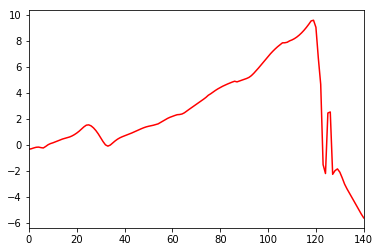

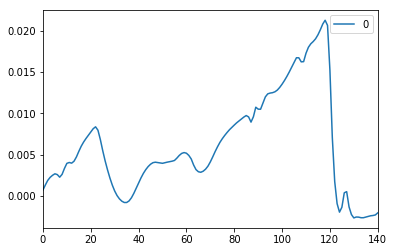

In [84]:
reward(s_batch).plot(c = 'red')
r_batch.plot()
plt.show()

In [ ]:
tf.reset_default_graph()

In [ ]:
state = tf.placeholder('float32', shape = [None, 41])
next_state = tf.placeholder('float32', shape = [None, 41])
action = tf.placeholder('float32', shape = [None, 18])

In [ ]:
h_size = 128

In [ ]:
h1 = fully_connected(inputs=state, num_outputs=h_size, activation_fn=tf.nn.elu)
h3 = fully_connected(inputs=next_state, num_outputs=h_size, activation_fn=tf.nn.elu)

h2 = fully_connected(inputs=tf.concat((h1, h3), axis =1), num_outputs=h_size, activation_fn=tf.nn.elu)
mu_hat = fully_connected(inputs=h2, num_outputs=18, activation_fn=tf.nn.elu)

loss = tf.reduce_mean(tf.squared_difference(action, mu_hat))
train = tf.train.AdamOptimizer().minimize(loss)

In [ ]:
cell = GRUCell(h_size,activation=tf.nn.tanh)
history = tf.placeholder('float32', shape = [None, None, 41+18])

out, state_out = tf.nn.dynamic_rnn(cell=cell, inputs=history, dtype='float32', sequence_length=[h_size])
out = tf.reshape(out, (-1, h_size))

state_hat = fully_connected(inputs=out, num_outputs=41, activation_fn=tf.nn.elu)
state_loss = tf.reduce_mean(tf.squared_difference(next_state, state_hat))

# mu_hat = fully_connected(inputs=state_out, num_outputs=18, activation_fn=tf.nn.elu)

# mu_loss = tf.reduce_mean(tf.squared_difference(action, mu_hat))
# loss = .8 * state_loss + 0.2 *mu_loss
train = tf.train.AdamOptimizer().minimize(state_loss)

In [ ]:
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

In [ ]:
for _ in range(5000):
    idx = int(np.random.randint(low=1, high=500,size=1))
    s_batch, a_batch, s1_batch = get_batch(idx)
    h = np.reshape(np.append(s_batch, a_batch), (-1, len(s_batch), 41+18))
    
    l, t = sess.run([state_loss, train], feed_dict = {history:h,action:a_batch, next_state:s1_batch})
    
    if _ % 50 == 0:
        print('current training step {} with loss {}'.format(_, l))
        if l>100:
            break

In [ ]:
s_0 = env.reset()
s_0 = np.reshape(s_0, (-1,41))
a = np.random.normal(size=18)

total_reward = 0
for i in range(500):
    
    s_1, r, t, _ = env.step(a)
    h = np.append(s1,a)
    h = np.reshape(h, (1,1,-1))
    a = sess.run(mu_hat, feed_dict = {history:h}).ravel()
    total_reward += r
    s_0 = s_1
    s_0 = np.reshape(s_0, (-1,41))
    if t:
        break

In [ ]:
for _ in range(5000):
    idx = int(np.random.randint(low=1, high=500,size=1))
    s_batch, a_batch, s1_batch = get_batch(idx)
#     s_batch = np.reshape(s_batch, (-1, len(s_batch), 41))
    
    l, t = sess.run([loss, train], feed_dict = {state:s_batch,next_state:s1_batch,action:a_batch})
    
    if _ % 50 == 0:
        print('current training step {} with loss {}'.format(_, l))

In [ ]:
env = RunEnv(visualize=True)    

In [ ]:
env.reset()
for i in range(len(a_batch)):
    env.step(a_batch[i])

In [ ]:
s_0 = env.reset()
s_0 = np.reshape(s_0, (-1,41))
total_reward = 0
a = np.random.normal(size=18)
for i in range(500):

    s_1, r, t, _ = env.step(a)
    s_1 = np.reshape(s_1, (-1,41))
    a = sess.run(mu_hat, feed_dict = {state:s_0, next_state:s_1}).ravel()
    total_reward += r
    s_0 = s_1
    s_0 = np.reshape(s_0, (-1,41))
    if t:
        break

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.plot(s_batch[:,1])
plt.show()

In [ ]:
df = pd.DataFrame(s_batch)